# Python 與機器學習（2）

## 郭耀仁

## 分類問題

- 從 Logistic Regression 羅吉斯回歸開始
- 雖然有回歸兩個字，但其實是個分類器
- 處理二元分類問題
    - Hot dog/Not hot dog
    - 垃圾/普通郵件
    - 詐欺/普通交易

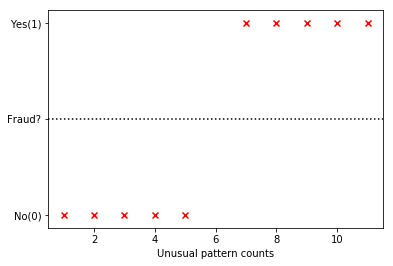

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_arr_1, x_arr_2 = np.arange(1, 6), np.arange(7, 12)
y_arr_1, y_arr_2 = np.zeros(5), np.ones(5)
plt.scatter(np.concatenate([x_arr_1, x_arr_2]), np.concatenate([y_arr_1, y_arr_2]), marker = 'x', color = 'r')
plt.xlabel("Unusual pattern counts")
plt.yticks([0, 0.5, 1], ["No(0)", "Fraud?", "Yes(1)"])
plt.axhline(y = 0.5, c = 'k', ls = ':')
plt.show()

## 分類問題（2）

- 我們需要將 $h(x) = \theta^{T}x$ 輸出的值域轉換至 $0 \leq h(x) \leq 1$
- 利用 $g$ 函數，也就是 sigmoid function

$$g(z) = \frac{1}{1+e^{-z}}$$
$$h(x) = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

- 練習繪畫 sigmoid function

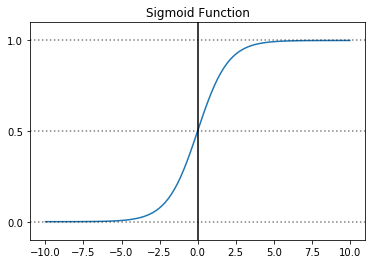

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid_fun(x)
plt.plot(x, y)
plt.axvline(0, color = 'black')
plt.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")
plt.show()

## 分類問題（3）

- 接著我們再做一次轉換，決定 $g(z)$ 輸出的機率該如何轉換至 $\hat{y} \in {\{0, 1\}}$

$$ \hat{y} =
  \begin{cases}
    1       & \quad \text{if } h(x)\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 分類問題（4）

![Logistic Regression](https://storage.googleapis.com/py_ml_images/logistic_regression.png)

## 分類問題（5）

$$\theta = \begin{bmatrix}
    -3 \\ 1 \\ 1
\end{bmatrix}$$

$$h(x) = \theta^{T}x = -3 + x_1 + x_2$$

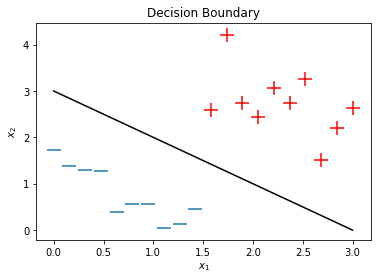

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 20)
x_points_len = int(len(x_points) / 2)
y_minus = np.array(random.choices(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.choices(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
plt.scatter(x_points[:x_points_len], y_minus, marker = '_', s = 200)
plt.scatter(x_points[x_points_len:], y_plus, marker = '+', c = 'r', s = 200)
plt.plot(x1_arr, 3 - x1_arr, c = 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary")
plt.show()

## 分類問題（6）

- 成本函數
- 使用跟迴歸問題不同的成本函數

$$J(h(x), y) =
  \begin{cases}
    -\log(h(x))  & \quad \text{if } y = 1\\
    -\log(1 - h(x))  & \quad \text{if } y = 0\\
  \end{cases}
$$

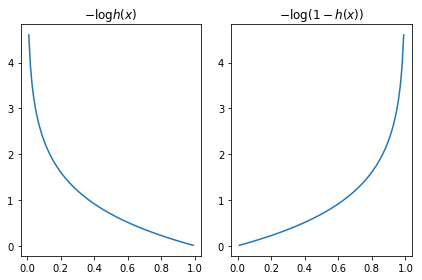

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("$-\log{h(x)}$")
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title("$-\log{(1-h(x))}$")
plt.tight_layout()
plt.show()

## 分類問題（7）

- 視覺化之後我們可以較清楚暸解 Logistic Regression 的成本函數意涵：
    - 當 y = 1 的時候，如果 $h(x)$ 預測是 0，則成本函數趨近無限大；反之成本函數為 0
    - 當 y = 0 的時候，如果 $h(x)$ 預測是 1，則成本函數趨近無限大；反之成本函數為 0

## 分類問題（8）

- 梯度遞減

$$J(h(x), y) = -y\log(h(x)) - (1-y)\log(1-h(x))$$

$$J(\theta) = -\frac{1}{m}\sum_{i = 1}^{m}[y\log(h(x))+(1-y)\log(1-h(x))]$$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} J(\theta)$$

## 分類問題（9）

- 延伸二元分類到多元分類問題：One-vs-all

$$y \in {\{0, 1, 2\}}$$
$$h^{0}(x) = P(y = 0 \mid x; \theta)$$
$$h^{1}(x) = P(y = 1 \mid x; \theta)$$
$$h^{2}(x) = P(y = 2 \mid x; \theta)$$
$$\text{prediction:}\;\;max(h^{0}(x), h^{1}(x), h^{2}(x))$$

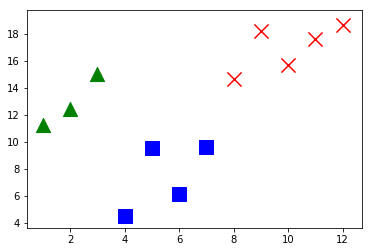

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.subplot(1, 3, 1)
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:], np.concatenate([y_arr_2, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([2, 5], [2, 18])
plt.subplot(1, 3, 2)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(np.concatenate([x_arr[:3], x_arr[7:]]), np.concatenate([y_arr_1, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([0, 15], [10, 12])
plt.subplot(1, 3, 3)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)
plt.scatter(x_arr[:7], np.concatenate([y_arr_1, y_arr_2]), c = 'k', marker = 'o', s = 200)
plt.plot([5, 10], [20, 3])

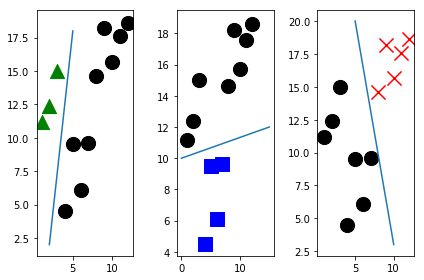

In [7]:
plt.tight_layout()
plt.show()